In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_curve, auc, confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/home/ziyad/Desktop/Datasets/Tree Survival Prediction/Tree_Data.csv')
df.head(20)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
5,18,1,C,Prunus serotina,0.106,Med,2016,Acer rubrum,1332,Non-Sterile,...,35.29,NaN,0.30,10.80,13.79,7,24.5,1.0,NaN,NaN
6,25,1,A,Quercus alba,0.108,Med,2016,Populus grandidentata,891,Non-Sterile,...,24.00,20.00,5.11,18.82,22.51,7,24.5,0.0,X,NaN
7,40,1,A,Quercus rubra,0.108,Med,2017,Sterile,1595,Sterile,...,4.00,0.00,3.43,25.22,14.81,7,24.5,0.0,X,NaN
8,26,1,A,Quercus rubra,0.108,Med,2016,Acer saccharum,1323,Non-Sterile,...,28.74,36.18,3.83,26.65,14.65,33,115.5,0.0,NaN,X
9,41,1,A,Acer saccharum,0.108,Med,2016,Populus grandidentata,394,Non-Sterile,...,14.16,NaN,-0.05,13.30,12.16,7,24.5,1.0,NaN,NaN


In [3]:
df.dropna(subset=['Event'], inplace=True)
df = df.drop(['Time','PlantDate', 'Harvest', 'Alive'], axis=1)

In [4]:
df['EMF'].fillna(df['EMF'].mean(), inplace=True)

In [5]:
df.isnull().sum()


No             0
Plot           0
Subplot        0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
AMF            0
EMF            0
Phenolics      0
Lignin         0
NSC            0
Census         0
Event          0
dtype: int64

In [6]:
df.head(20)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Event
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,22.00,26.479844,-0.56,13.86,12.15,4,1.0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,15.82,31.070000,5.19,20.52,19.29,33,0.0
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,24.45,28.190000,3.36,24.74,15.01,18,1.0
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,22.23,26.479844,-0.71,14.29,12.36,4,1.0
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,21.15,26.479844,-0.58,10.85,11.20,4,1.0
5,18,1,C,Prunus serotina,0.106,Med,2016,Acer rubrum,1332,Non-Sterile,Heterospecific,AMF,AMF,35.29,26.479844,0.30,10.80,13.79,7,1.0
6,25,1,A,Quercus alba,0.108,Med,2016,Populus grandidentata,891,Non-Sterile,Heterospecific,EMF,EMF,24.00,20.000000,5.11,18.82,22.51,7,0.0
7,40,1,A,Quercus rubra,0.108,Med,2017,Sterile,1595,Sterile,Sterilized,EMF,Sterile,4.00,0.000000,3.43,25.22,14.81,7,0.0
8,26,1,A,Quercus rubra,0.108,Med,2016,Acer saccharum,1323,Non-Sterile,Heterospecific,EMF,AMF,28.74,36.180000,3.83,26.65,14.65,33,0.0
9,41,1,A,Acer saccharum,0.108,Med,2016,Populus grandidentata,394,Non-Sterile,Heterospecific,AMF,EMF,14.16,26.479844,-0.05,13.30,12.16,7,1.0


In [7]:
lst=["Species","Light_Cat","Soil","Sterile","Conspecific","Myco","SoilMyco", "Subplot"]
le=LabelEncoder()
for i in lst:
    df[i]=le.fit_transform(df[i])
    
df['Adult'] = df['Adult'].astype(str)
df['Adult'] = le.fit_transform(df['Adult'])

In [8]:
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Event
0,126,1,2,0,0.106,2,2017,3,34,0,1,0,0,22.00,26.479844,-0.56,13.86,12.15,4,1.0
1,11,1,2,2,0.106,2,2017,5,30,0,1,1,1,15.82,31.070000,5.19,20.52,19.29,33,0.0
2,12,1,2,3,0.106,2,2017,3,35,0,1,1,0,24.45,28.190000,3.36,24.74,15.01,18,1.0
3,2823,7,3,0,0.080,2,2016,3,35,0,1,0,0,22.23,26.479844,-0.71,14.29,12.36,4,1.0
4,5679,14,0,0,0.060,1,2017,3,26,0,1,0,0,21.15,26.479844,-0.58,10.85,11.20,4,1.0


In [9]:
X=df.drop(['Sterile'],axis=1)
y=df['Sterile']

In [10]:
params = {
    "max_depth": range(1, 9),
    "min_samples_split": [5, 7, 9, 12, 15],
    "min_samples_leaf": [5, 7, 9, 10, 12]
}

s_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

estimator = RandomForestClassifier(random_state=42)
scoring = make_scorer(f1_score)

grid_search = GridSearchCV(
    estimator=estimator, 
    param_grid=params, 
    scoring=scoring, 
    cv=s_kfold, 
    n_jobs=-1
)

search_results = grid_search.fit(X, y)

best_params = search_results.best_params_
best_score = search_results.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best score: 1.0


In [11]:
fi = pd.Series(search_results.best_estimator_.feature_importances_, index = X.columns)
fi

No             0.01
Plot           0.00
Subplot        0.00
Species        0.00
Light_ISF      0.00
Light_Cat      0.00
Core           0.01
Soil           0.20
Adult          0.04
Conspecific    0.20
Myco           0.00
SoilMyco       0.17
AMF            0.08
EMF            0.10
Phenolics      0.10
Lignin         0.03
NSC            0.01
Census         0.05
Event          0.00
dtype: float64

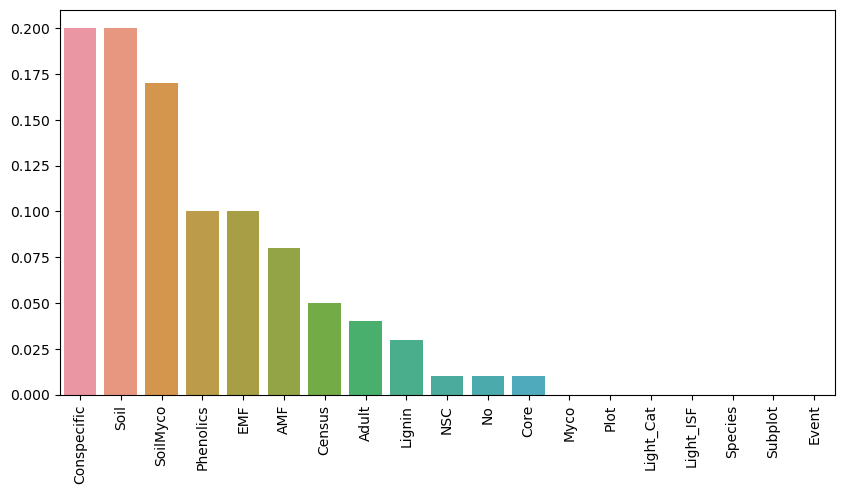

In [12]:
plt.figure(figsize=(10,5))

# Sort the feature importance values in descending order
sorted_fi = fi.sort_values(ascending=False)

# Create a bar plot
ax = sns.barplot(x=sorted_fi.index, y=sorted_fi)

# Rotate x-axis labels for better readability
ax.tick_params(rotation=90, axis='x')

# Show the plot
plt.show()

In [13]:
important_features = fi[fi >= 0.04 ].index.to_list()
important_features

['Soil',
 'Adult',
 'Conspecific',
 'SoilMyco',
 'AMF',
 'EMF',
 'Phenolics',
 'Census']

In [15]:
reduced_data = df.loc[:,['Soil',
 'Adult',
 'Conspecific',
 'SoilMyco',
 'AMF',
 'EMF',
 'Phenolics',
 'Census',
 'Sterile']]
df_reduced = reduced_data.copy()
df_reduced.head(20)

,Soil,Adult,Conspecific,SoilMyco,AMF,EMF,Phenolics,Census,Sterile
0,3,34,1,0,22.00,26.479844,-0.56,4,0
1,5,30,1,1,15.82,31.070000,5.19,33,0
2,3,35,1,0,24.45,28.190000,3.36,18,0
3,3,35,1,0,22.23,26.479844,-0.71,4,0
4,3,26,1,0,21.15,26.479844,-0.58,4,0
5,0,9,1,0,35.29,26.479844,0.30,7,0
6,2,27,1,1,24.00,20.000000,5.11,7,0
7,6,15,2,2,4.00,0.000000,3.43,7,1
8,1,6,1,0,28.74,36.180000,3.83,33,0
9,2,22,1,1,14.16,26.479844,-0.05,7,0


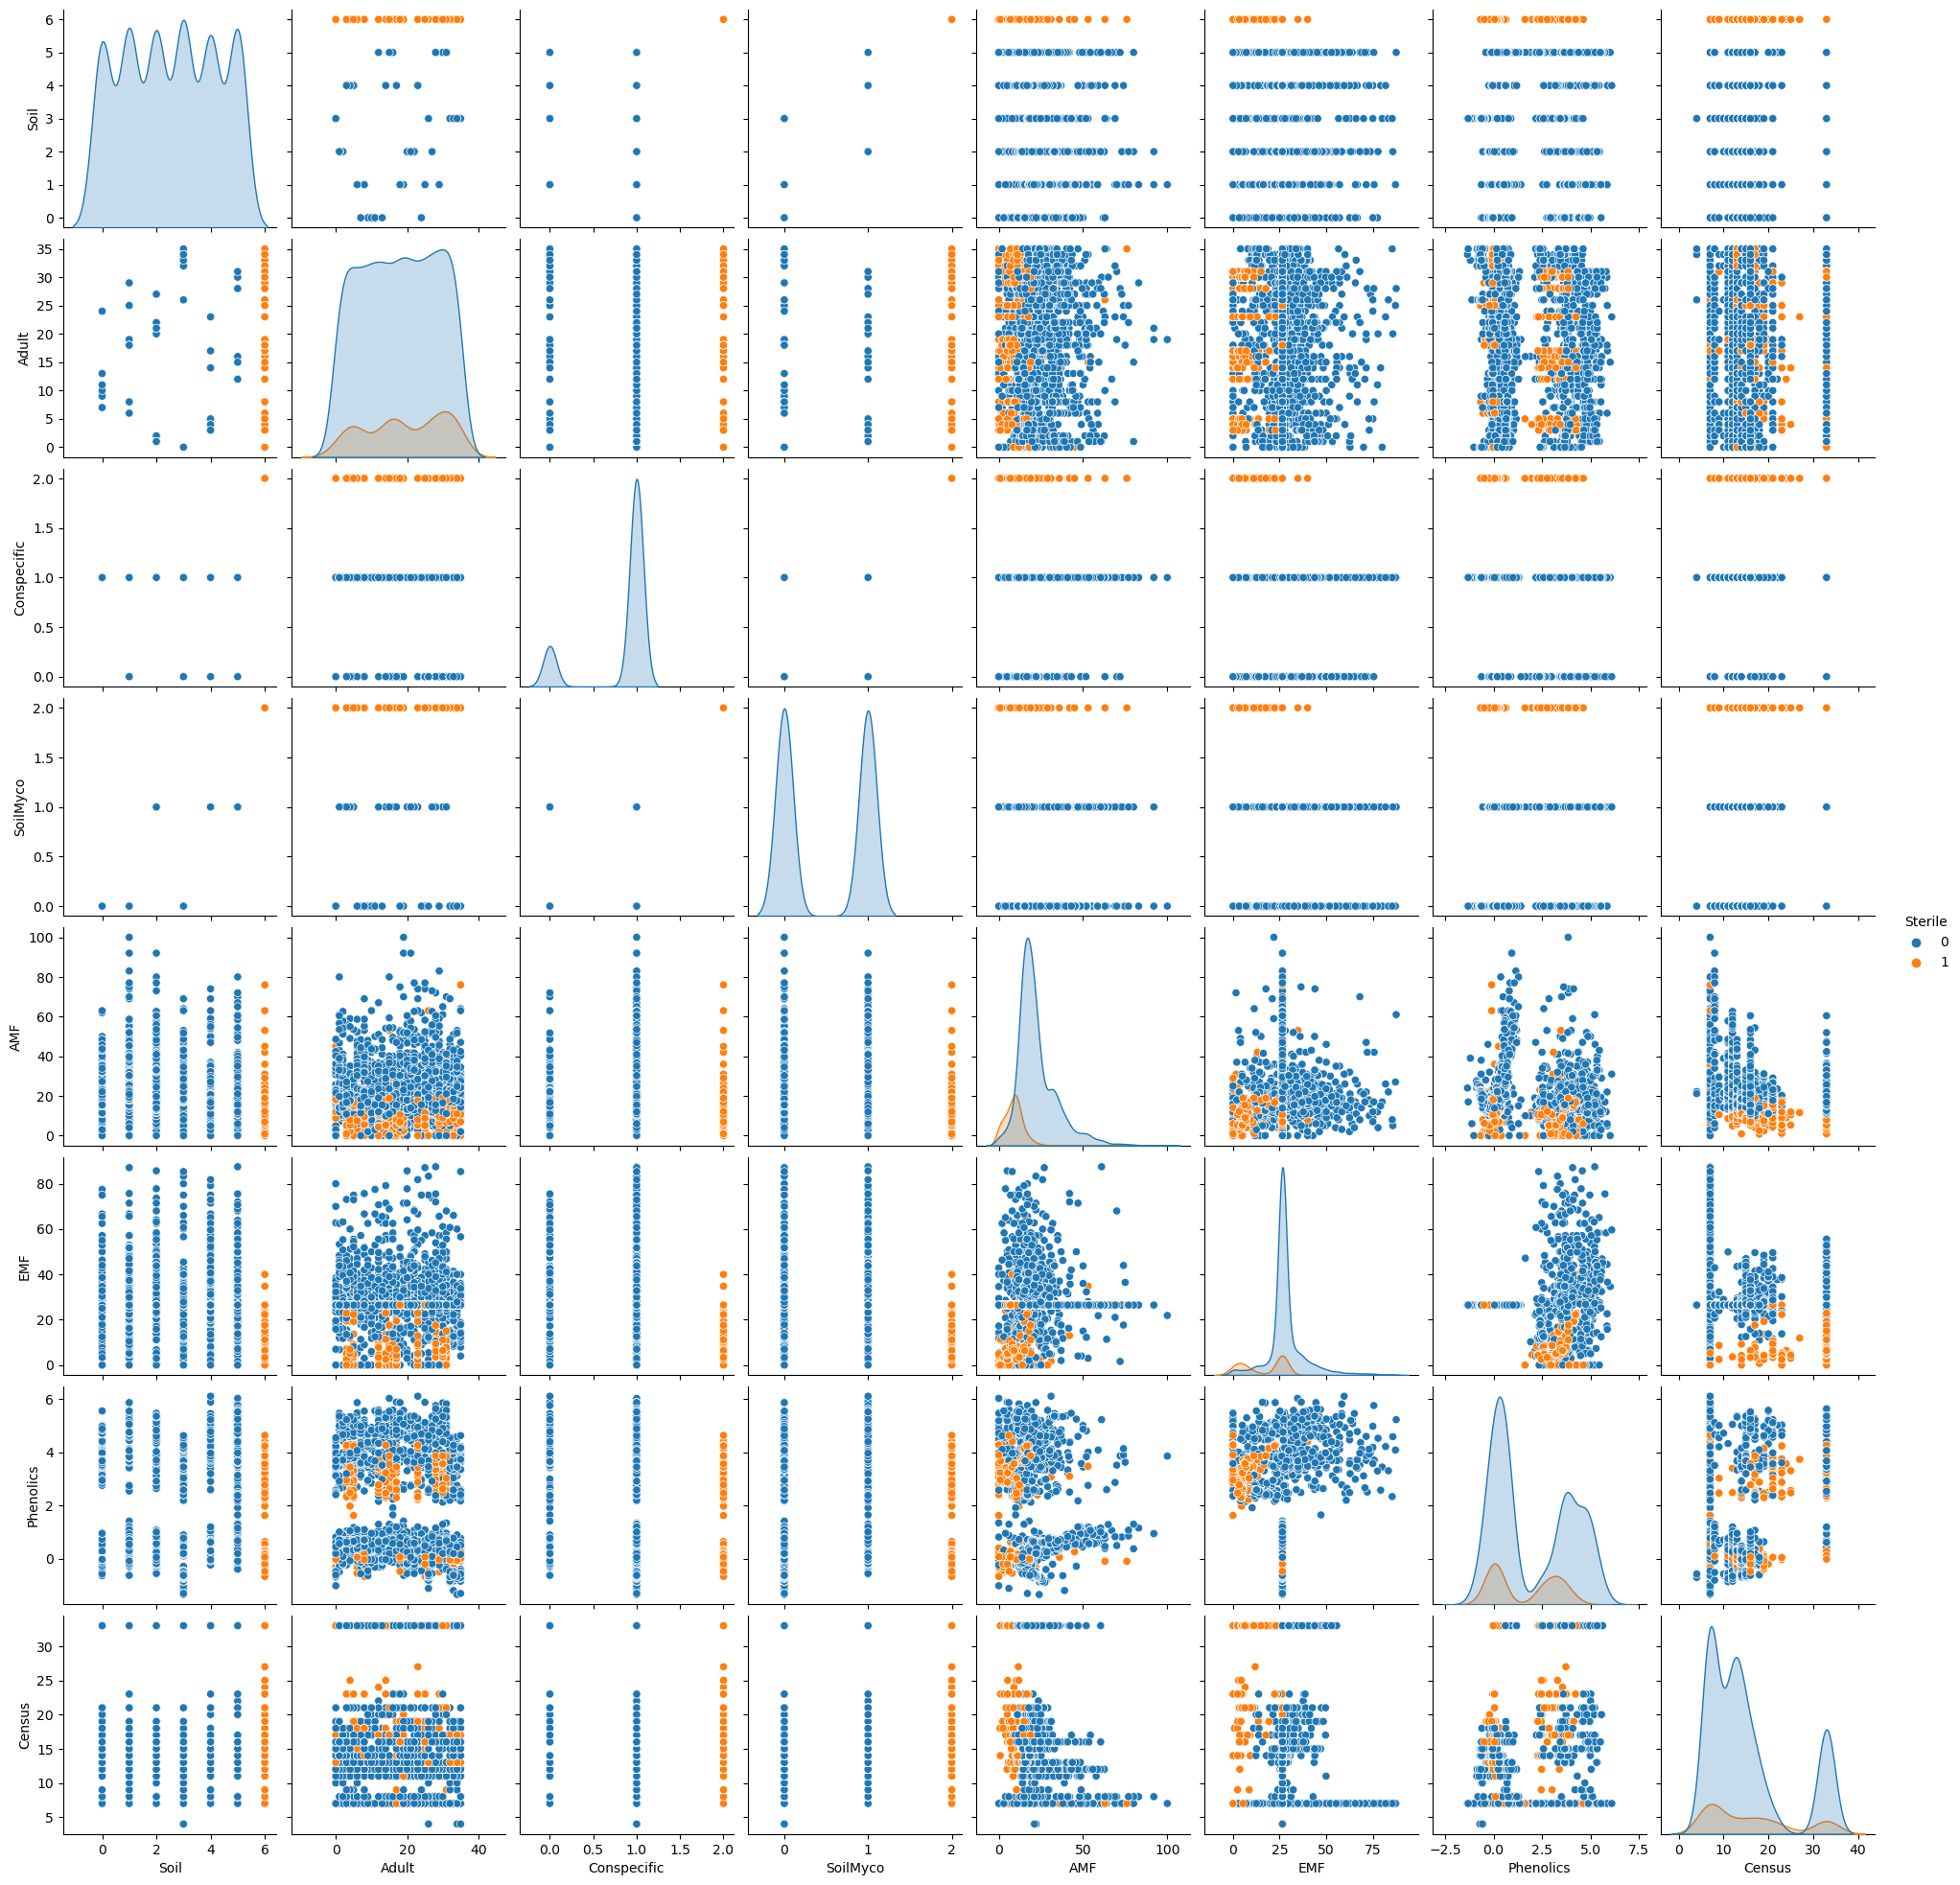

In [16]:
sns.pairplot(reduced_data, hue='Sterile', diag_kind='kde');


In [17]:
y = df_reduced['Sterile']
X = df_reduced.drop('Sterile', axis=1)

In [18]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
X,y=sm.fit_resample(X,y)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=4)


KNeihborsClassifer

In [20]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
df_knn = pd.DataFrame(classification_report(y_pred1, y_test, digits=2, output_dict=True)).T
df_knn['support'] = df_knn.support.apply(int)
df_knn.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.934211,1.000000,0.965986,213
1,1.000000,0.942085,0.970179,259
accuracy,0.968220,0.968220,0.968220,0
macro avg,0.967105,0.971042,0.968083,472
weighted avg,0.970311,0.968220,0.968287,472


In [21]:
print(confusion_matrix(y_test, y_pred1))
print('True Positves: ', confusion_matrix(y_test, y_pred1)[0][0])
print('False Positives: ', confusion_matrix(y_test, y_pred1)[0][1])
print('False Negatives: ', confusion_matrix(y_test, y_pred1)[1][0])
print('True Negatives: ', confusion_matrix(y_test, y_pred1)[1][1])

[[213  15]
 [  0 244]]
True Positves:  213
False Positives:  15
False Negatives:  0
True Negatives:  244


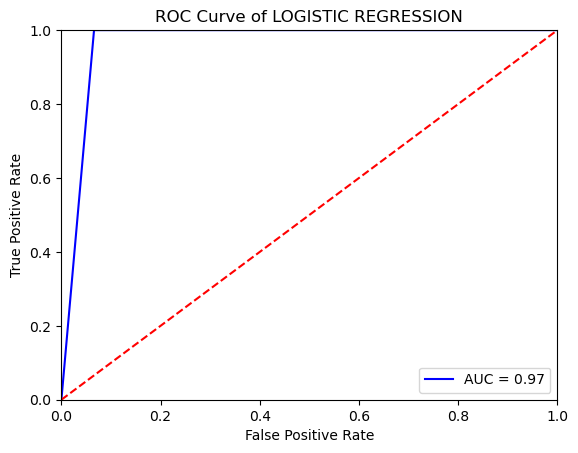

In [22]:
# ROC Curve of Logistic Regression

Y_scores = knn1.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()